In [1]:
#Notebook para Análise e Predições do Consumo de Cervejas durante um ano no estado de São Paulo
#O dataset encontra-se na pasta datasets do repositório.
#Predições de Regressão Linear e Gráficos exibidos, foram baseados em: https://www.kaggle.com/melihkanbay/does-temperature-affect-consumption-of-beer/

#Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import numpy as np
plt.style.use('seaborn-darkgrid')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

filename=fn
print(filename)

Saving cerveja_sp.csv to cerveja_sp.csv
User uploaded file "cerveja_sp.csv" with length 20376 bytes
cerveja_sp.csv


In [3]:
#Leitura do Dataset
df = pd.read_csv(filename)
#Ajuste de parâmentros 
df.dropna(inplace=True)
df['Final de Semana']=df['Final de Semana'].astype('int')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0,20.467


In [4]:
#Verificação do tipo de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.8+ KB


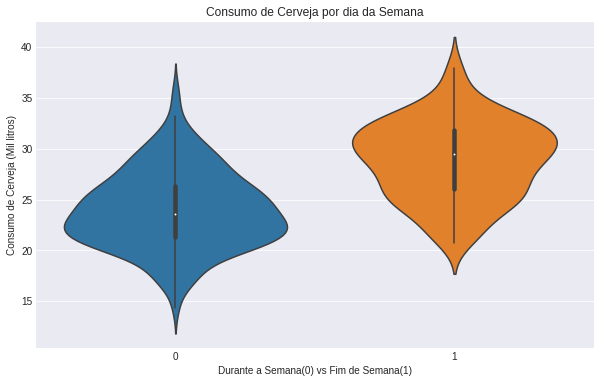

In [5]:
#Plotagem de gráficos violino
plt.figure(figsize=(10,6))
sns.violinplot(x="Final de Semana", y="Consumo de cerveja (litros)",data=df)
plt.title("Consumo de Cerveja por dia da Semana")
plt.xlabel("Durante a Semana(0) vs Fim de Semana(1)")
plt.ylabel("Consumo de Cerveja (Mil litros)")
plt.show()

In [6]:
#Adequação dos títulos das colunas afim de evitar erros na execução do algoritmo
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')
df.columns

Index(['Data', 'Temperatura_Media_C', 'Temperatura_Minima_C',
       'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana',
       'Consumo_de_cerveja_litros'],
      dtype='object')

In [7]:
#Ajustes dos dados das colunas e conversões para dados numéricos
df['Temperatura_Media_C'] = df['Temperatura_Media_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Minima_C'] = df['Temperatura_Minima_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Maxima_C'] = df['Temperatura_Maxima_C'].str.replace(',' ,'.').astype(float)
df['Precipitacao_mm'] = df['Precipitacao_mm'].str.replace(',' ,'.').astype(float)
df['Final_de_Semana'] = df['Final_de_Semana'].astype(int)

In [8]:
#Cálculo das médias amostrais de fins de semana e dias da semana
dow=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==0])/5
weekend=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==1])/2
labels = ['Consumo durante a Semana','Consumo Fim de Semana']
values = [dow,weekend]

#Plotagem do gráfico
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Amostra de consumo semanal de cerveja')
fig.show()

In [9]:
#Calculo do consumo médio cerveja durante os dias da semana e durante o final de semana
dow1=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==0])/(365-96)
weekend2=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==1])/(365-269)
days=["Durante a Semana","Fim de Semana"]

#Plotagem
fig=go.Figure([go.Bar(x=days,y=[dow1,weekend2])])
fig.update_layout(title='Amostra diária do consumo de Cerveja',
                   xaxis_title='Dias',
                   yaxis_title='Consumo de Cerveja (Mil Litros)')
fig.show()

In [10]:
#Captação e plotagem amostral do consumo durante uma semana do ano
datadate=df[4:11]
fig = go.Figure(data=go.Scatter(x=datadate.Data, y=datadate.Consumo_de_cerveja_litros))
fig.update_layout(title='Sample of weekly beer consumption day by day ',
                   xaxis_title='Days',
                   yaxis_title='Beer consumption')
fig.show()

In [11]:
#Plotagem da amostragem em formato de barras
fig=go.Figure([go.Bar(x=datadate.Data,y=datadate.Consumo_de_cerveja_litros)])
fig.update_layout(title='Amostragem do consumo de cerveja por dia',
                   xaxis_title='Dias',
                   yaxis_title='Consumo de Cerveja ( Mil Litros)')
fig.show()

In [12]:
#Plotagem do gráfico caixa durante os meses do ano
df["Data"]= pd.to_datetime(df["Data"]) 
df['month'] = pd.to_datetime(df['Data']).dt.month
fig = go.Figure(data=go.Box(x=df.month,y=df.Consumo_de_cerveja_litros.values))
fig.update_layout(title='Beer consumption month by month ',
                   xaxis_title='Month',
                   yaxis_title='Beer consumption')
plt.savefig(fname="xx")
fig.show()

<Figure size 432x288 with 0 Axes>

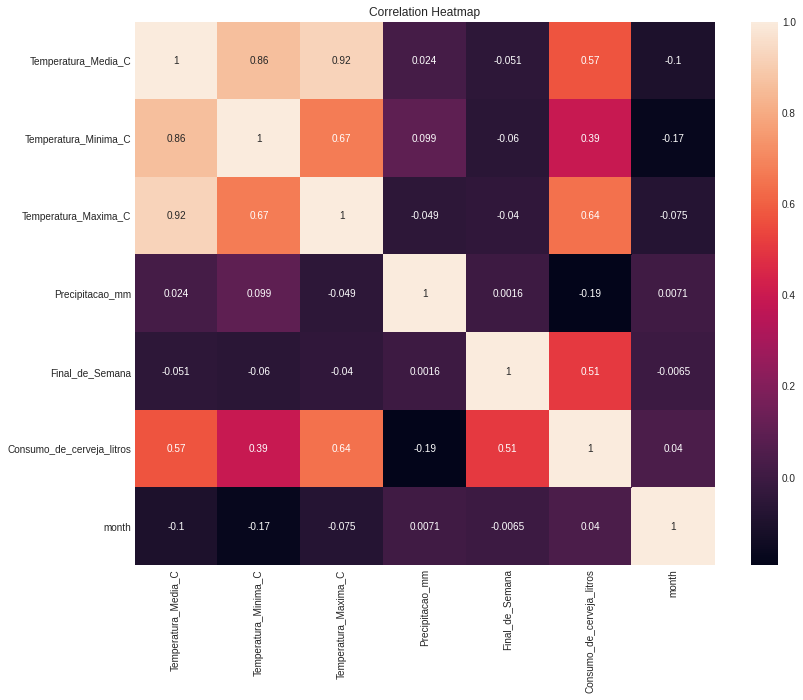

In [13]:
#Mapa de correlação entre as variáveis para uma análise técnica apurada
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

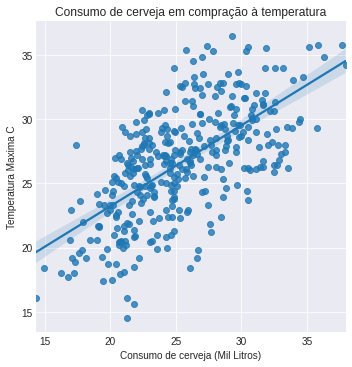

In [14]:
#Plotagem da relação entre Temperatura máxima X Consumo
sns.lmplot(x="Consumo_de_cerveja_litros", y="Temperatura_Maxima_C", data=df)
plt.xlabel("Consumo de cerveja (Mil Litros)")
plt.ylabel("Temperatura Maxima C")
plt.title("Consumo de cerveja em compração à temperatura")
plt.show()

PREDIÇÃO POR REGRESSÃO LINEAR
=====================



In [15]:
#Importação da biblioteca para aplicação da Regressão Linear
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df.Consumo_de_cerveja_litros.values.reshape(-1,1)
y=df.Temperatura_Maxima_C.values.reshape(-1,1)
x.shape,y.shape

((365, 1), (365, 1))

Ajustes dos dados

In [16]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
array=np.arange(50).reshape(-1,1)
y_head=lr.predict(array)

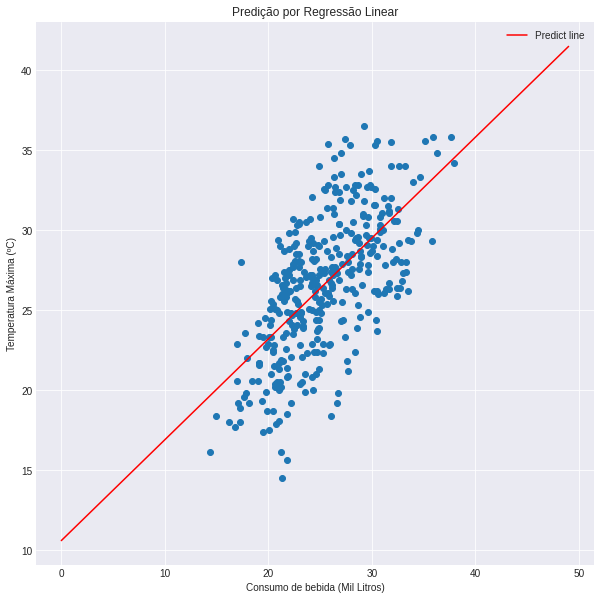

In [18]:
#Plotagem da regressão baseada nos dados
plt.figure(figsize=(10,10))
plt.plot(array,y_head,color="red",label="Predict line")
plt.scatter(x,y)
plt.title("Predição por Regressão Linear")
plt.xlabel("Consumo de bebida (Mil Litros)")
plt.ylabel("Temperatura Máxima (ºC)")
plt.legend()
plt.show()

In [19]:
#Predição do consumo, baseado na temperatura que se deseja
#Alterar a variavel temperatura, para calculo do consumo estimado.
temperatura=30
lr.predict([[temperatura]])[0][0]

29.511982583018323

PREDIÇÃO DIÁRIA POR SVR
===============



In [20]:
#Importação da biblioteca SVR
from sklearn.svm import SVR

In [21]:
df

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,month
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307,12
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095,12
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309,12
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467,12


In [22]:
#Ajuste das datas, para captação do dia
df_days=df.loc[:, 'Data']
df_consumo=df.loc[:,'Consumo_de_cerveja_litros']
df_days= df_days.apply(lambda x: x.strftime('%Y-%m-%d').split('-'))
df_days

0      [2015, 01, 01]
1      [2015, 01, 02]
2      [2015, 01, 03]
3      [2015, 01, 04]
4      [2015, 01, 05]
            ...      
360    [2015, 12, 27]
361    [2015, 12, 28]
362    [2015, 12, 29]
363    [2015, 12, 30]
364    [2015, 12, 31]
Name: Data, Length: 365, dtype: object

In [23]:
#Criação de arrais para plotagem
days=list()
consumo=list()
for day in df_days:
  days.append([int(day[2])])
for valor in df_consumo:
	consumo.append(float(valor))


In [24]:
num=np.arange(1,366)
i=0
days=list()
consumo=list()
for day in df_days:
  days.append([int(num[i])])
  i+=1
for valor in df_consumo:
	consumo.append(float(valor))

days=days[:-1]
consumo=consumo[:-1]


In [25]:
#Calculo da Regressão linear, polinomial e RBF
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(days, consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(days, consumo)

rbf_svr=SVR(kernel='rbf',C=50, gamma=0.15)
rbf_svr.fit(days, consumo)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

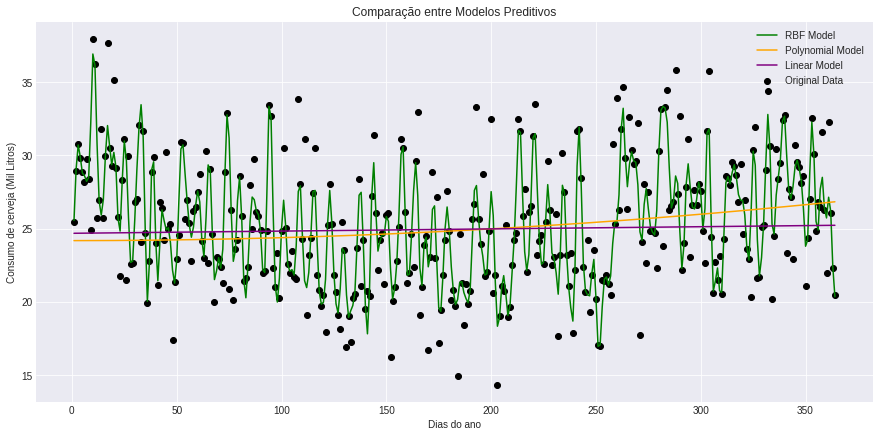

In [26]:
#PLotagem dos resultados
plt.figure(figsize=(15,7))
plt.scatter(days,consumo,color='black',label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.title("Comparação entre Modelos Preditivos")
plt.xlabel("Dias do ano")
plt.ylabel("Consumo de cerveja (Mil Litros)")
plt.legend()
plt.show()

In [27]:
day=365
the_day=[[day]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_day)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_day)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(the_day)[0])
try:
  print('O valor correto é: ',df['Consumo_de_cerveja_litros'][day-1])
except:
  pass



A previsão pelo modelo RBF é:  21.773569671674174
A previsão pelo modelo Linear é:  25.237499984707
A previsão pelo modelo Polinomial é:  26.85462093329416
O valor correto é:  22.445999999999998


PREDIÇÃO MENSAL POR SVR
===========

In [28]:
#É realizada exatamente o mesmo tipo de predição, porém em escala mensal, ao invéz de diária.
from sklearn.svm import SVR

In [29]:
df

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,month
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307,12
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095,12
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309,12
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467,12


In [30]:
df_days=df.loc[:, 'Data']
df_consumo=df.loc[:,'Consumo_de_cerveja_litros']
df_days= df_days.apply(lambda x: x.strftime('%Y-%m-%d').split('-'))
df_days

0      [2015, 01, 01]
1      [2015, 01, 02]
2      [2015, 01, 03]
3      [2015, 01, 04]
4      [2015, 01, 05]
            ...      
360    [2015, 12, 27]
361    [2015, 12, 28]
362    [2015, 12, 29]
363    [2015, 12, 30]
364    [2015, 12, 31]
Name: Data, Length: 365, dtype: object

In [31]:
list_month=[[]]
list_month[0].append(1)
list_month.append(2)
list_month.append(3)
list_month[0].append(3)
list_month

[[1, 3], 2, 3]

In [32]:
df

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,month
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307,12
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095,12
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309,12
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467,12


In [33]:
#Adequação dos períodos para mensal
list_month=[]
list_consumo=[]
consumo=0
last_month="01"

for i in range(0,len(df_days)):
  if df_days[i][1] not in list_month:
    list_month.append(df_days[i][1])
t=1
for i in range(0,len(df_days)):
  if df_days[i][1] !=last_month:
    last_month=df_days[i][1]
    list_consumo.append(consumo)
    consumo=df['Consumo_de_cerveja_litros'][i]
  else:
    consumo=consumo+df['Consumo_de_cerveja_litros'][i]
  
  if i ==len(df_days)-1:
    list_consumo.append(consumo)


In [34]:
month = np.asarray(list_month)
list_consumo=np.asarray(list_consumo)
month=month.astype(int)
month=month.reshape(-1,1)


lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(month, list_consumo)

poly_svr=SVR(kernel='poly', C=100.0, degree=2)
poly_svr.fit(month, list_consumo)

rbf_svr=SVR(kernel='rbf',C=100.0, gamma=0.15)
rbf_svr.fit(month, list_consumo)

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

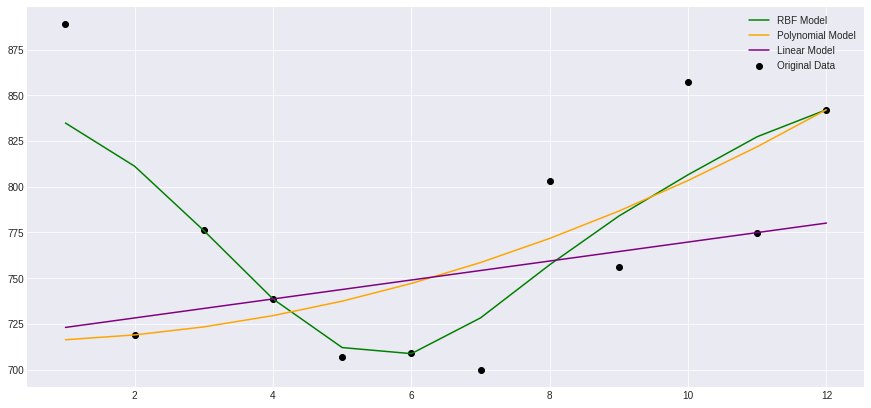

In [35]:
plt.figure(figsize=(15,7))
plt.scatter(month,list_consumo,color='black',label='Original Data')
plt.plot(month, rbf_svr.predict(month), color='green', label='RBF Model')
plt.plot(month, poly_svr.predict(month), color='orange', label='Polynomial Model')
plt.plot(month, lin_svr.predict(month), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [36]:
the_month=11
thee_month=[[the_month]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(thee_month)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(thee_month)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(thee_month)[0])
try:
  print('O valor correto é: ',list_consumo[the_month-1])
except:
  pass


A previsão pelo modelo RBF é:  827.3992826624306
A previsão pelo modelo Linear é:  774.9460000000004
A previsão pelo modelo Polinomial é:  821.914321421103
O valor correto é:  774.846


Gráficos
=======

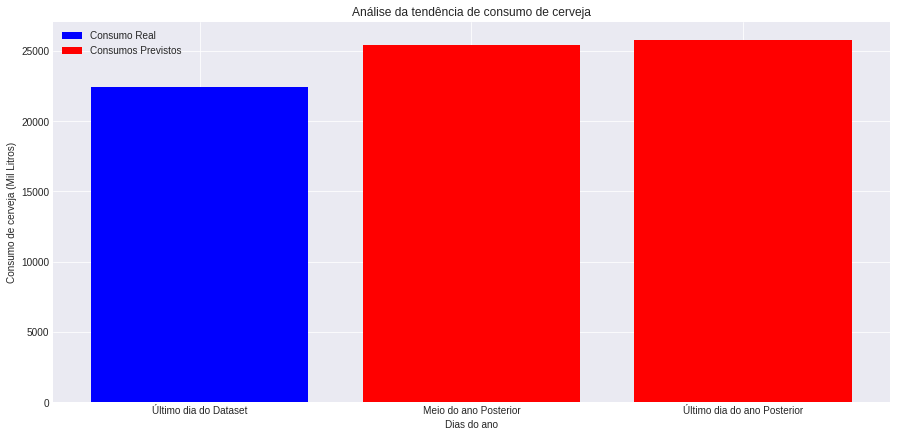

In [37]:
labels=['Último dia do Dataset','Meio do ano Posterior','Último dia do ano Posterior']
labels2=['Meio do ano Posterior','Último dia do ano Posterior']
valores=[22440,25424,25784]
valores2=[25424,25784]
plt.figure(figsize=(15,7))
plt.bar(labels, valores, color='blue', label='Consumo Real')
plt.bar(labels2, valores2, color='red', label='Consumos Previstos')
bottom, top = plt.ylim()  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.ylim(bottom, top)     # set the ylim to bottom, top
plt.title("Análise da tendência de consumo de cerveja")
plt.xlabel("Dias do ano")
plt.ylabel("Consumo de cerveja (Mil Litros)")

plt.legend()
plt.show()